## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [1]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [2]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [3]:
for c in data.columns:
    print(data[c].value_counts())

3    709
1    323
2    277
Name: pclass, dtype: int64
0    809
1    500
Name: survived, dtype: int64
Connolly, Miss. Kate             2
Kelly, Mr. James                 2
Allen, Miss. Elisabeth Walton    1
Ilmakangas, Miss. Ida Livija     1
Ilieff, Mr. Ylio                 1
                                ..
Hart, Miss. Eva Miriam           1
Harris, Mr. Walter               1
Harris, Mr. George               1
Harper, Rev. John                1
Zimmerman, Mr. Leo               1
Name: name, Length: 1307, dtype: int64
male      843
female    466
Name: sex, dtype: int64
?         263
24         47
22         43
21         41
30         40
         ... 
66          1
0.6667      1
76          1
67          1
26.5        1
Name: age, Length: 99, dtype: int64
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parch, dtype: int64
CA. 2343    11
1601         8
CA 2144 

In [4]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [5]:
data['cabin']

0            B5
1       C22 C26
2       C22 C26
3       C22 C26
4       C22 C26
         ...   
1304        NaN
1305        NaN
1306        NaN
1307        NaN
1308        NaN
Name: cabin, Length: 1309, dtype: object

In [6]:
data['cabin'][1].split()[0]

'C22'

In [7]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,NaN,C,NaN,304,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,NaN,C,NaN,NaN,NaN


In [8]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [9]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [10]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [11]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [12]:
# save the data set

data.to_csv('titanic.csv', index=False)

In [13]:
for c in data.columns:
    print(data[c].dtype)

int64
int64
object
float64
int64
int64
float64
object
object
object


## Data Exploration

### Find numerical and categorical variables

In [14]:
target = 'survived'

In [15]:
vars_num = [c for c in data.columns if (data[c].dtype=='int64' or data[c].dtype=='float64') and c!=target]

vars_cat = [c for c in data.columns if c not in vars_num and c!=target]

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 5
Number of categorical variables: 4


In [16]:
vars_num

['pclass', 'age', 'sibsp', 'parch', 'fare']

### Find missing values in variables

In [17]:
# first in numerical variables
for c in vars_num:
    print(c, data[c].isna().mean())


pclass 0.0
age 0.20091673032849502
sibsp 0.0
parch 0.0
fare 0.0007639419404125286


In [18]:
# now in categorical variables
for c in vars_cat:
    print(c, data[c].isna().mean())

sex 0.0
cabin 0.774637127578304
embarked 0.0015278838808250573
title 0.0


### Determine cardinality of categorical variables

In [19]:
for c in vars_cat:
    print("The cardinality of ", c, " is ", data[c].nunique())

The cardinality of  sex  is  2
The cardinality of  cabin  is  181
The cardinality of  embarked  is  3
The cardinality of  title  is  5


### Determine the distribution of numerical variables

In [20]:
vars_num

['pclass', 'age', 'sibsp', 'parch', 'fare']

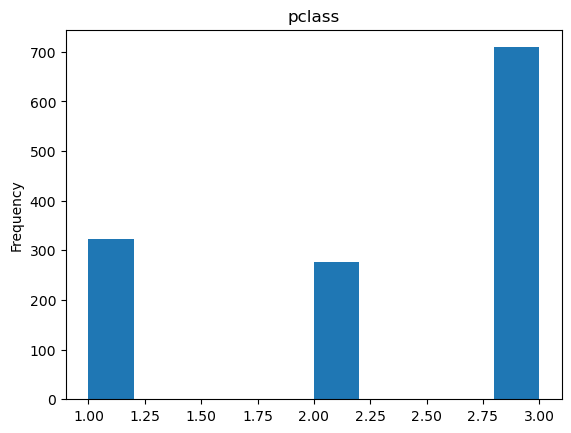

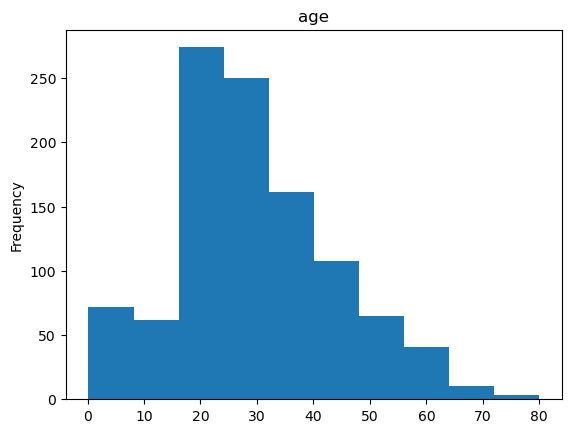

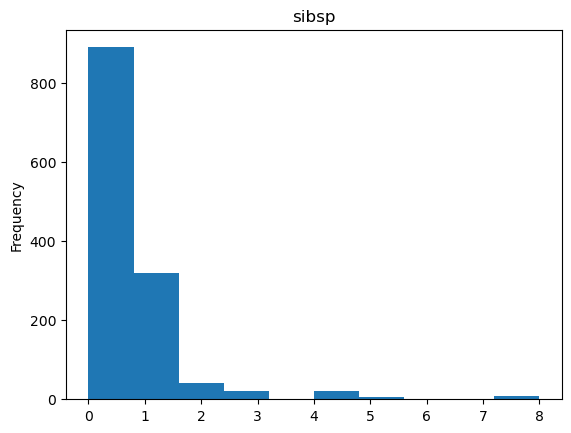

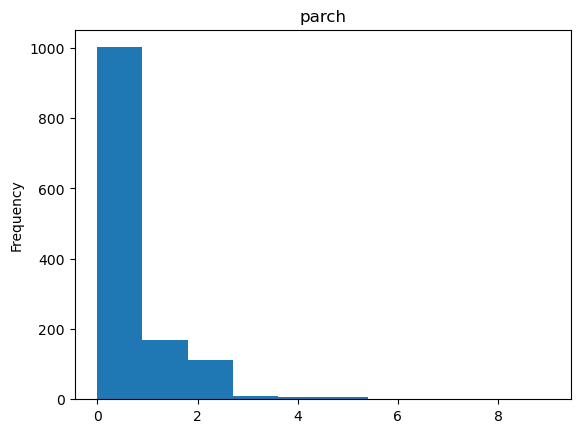

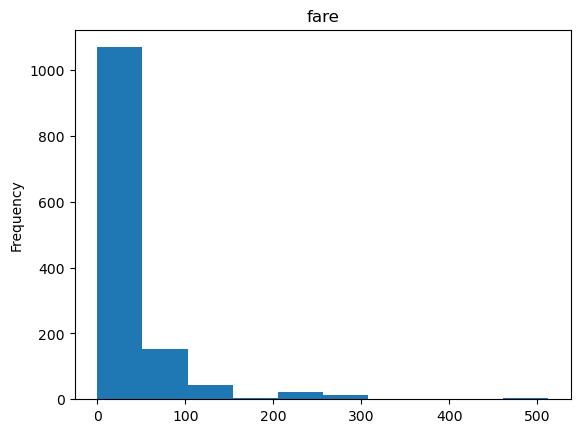

In [21]:
for c in vars_num:
    data[c].plot(kind='hist', title=c)
    plt.show()

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

In [23]:
data['cabin'][0][0]

'B'

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [24]:
X_train['cabin'] = X_train['cabin'].str[0]
X_test['cabin'] = X_test['cabin'].str[0]

In [25]:
X_train['cabin'].unique()

array([nan, 'E', 'F', 'A', 'C', 'D', 'B', 'T', 'G'], dtype=object)

### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [26]:
for c in vars_num:
    print(c,X_train[c].isna().mean())
    

pclass 0.0
age 0.19675262655205347
sibsp 0.0
parch 0.0
fare 0.0009551098376313276


In [27]:
for c in ['age', 'fare']:
    X_train[c+"_missing"] = np.where(X_train[c].isna(), 1,0)
    X_test[c+"_missing"] = np.where(X_test[c].isna(),1,0)
    
    median = X_train[c].median()
    X_train[c] = X_train[c].fillna(median)
    X_test[c] = X_test[c].fillna(median)

In [28]:
X_train

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_missing,fare_missing
1118,3,male,25.0000,0,0,7.9250,NaN,S,Mr,0,0
44,1,female,41.0000,0,0,134.5000,E,C,Miss,0,0
1072,3,male,28.0000,0,0,7.7333,NaN,Q,Mr,1,0
1130,3,female,18.0000,0,0,7.7750,NaN,S,Miss,0,0
574,2,male,29.0000,1,0,21.0000,NaN,S,Mr,0,0
...,...,...,...,...,...,...,...,...,...,...,...
763,3,female,0.1667,1,2,20.5750,NaN,S,Miss,0,0
835,3,male,28.0000,0,0,8.0500,NaN,S,Mr,1,0
1216,3,female,28.0000,0,0,7.7333,NaN,Q,Miss,1,0
559,2,female,20.0000,0,0,36.7500,NaN,S,Miss,0,0


### Replace Missing data in categorical variables with the string **Missing**

In [29]:
for c in ['cabin', 'embarked']:
    X_train.loc[X_train[c].isna(), c] = "Missing"
    X_test.loc[X_test[c].isna(), c] = "Missing"

In [30]:
X_train['cabin']

1118    Missing
44            E
1072    Missing
1130    Missing
574     Missing
         ...   
763     Missing
835     Missing
1216    Missing
559     Missing
684     Missing
Name: cabin, Length: 1047, dtype: object

In [31]:
X_train['cabin'].describe()

count        1047
unique          9
top       Missing
freq          803
Name: cabin, dtype: object

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [32]:
vars_cat

['sex', 'cabin', 'embarked', 'title']

In [33]:
X_test['cabin'].value_counts(normalize=True)

Missing    0.805344
C          0.061069
B          0.049618
D          0.038168
E          0.019084
A          0.011450
F          0.011450
G          0.003817
Name: cabin, dtype: float64

In [34]:
for c in vars_cat:
    rare_labels = [val for val in X_train[c].unique() if (X_train[c]==val).mean()<0.05]
    X_train[c]  = np.where(X_train[c].isin(rare_labels), "Rare", X_train[c])
    rare_labels = [val for val in X_test[c].unique() if (X_test[c]==val).mean()<0.05]
    X_test[c]  = np.where(X_test[c].isin(rare_labels), "Rare", X_test[c])

In [35]:
for c in vars_cat:
    print(c, X_train[c].value_counts())

sex male      663
female    384
Name: sex, dtype: int64
cabin Missing    803
Rare       166
C           78
Name: cabin, dtype: int64
embarked S       743
C       205
Q        97
Rare      2
Name: embarked, dtype: int64
title Mr      596
Miss    210
Mrs     167
Rare     74
Name: title, dtype: int64


In [36]:
pd.get_dummies(X_train[vars_cat[0]], prefix=vars_cat[0], drop_first=False)

,sex_female,sex_male
1118,0,1
44,1,0
1072,0,1
1130,1,0
574,0,1
...,...,...
763,1,0
835,0,1
1216,1,0
559,1,0


### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [37]:
pd.Series(sorted(X_train[c].unique())).equals(pd.Series(sorted(X_test[c].unique())))

False

In [38]:
X_train[c].unique()

array(['Mr', 'Miss', 'Mrs', 'Rare'], dtype=object)

In [39]:
X_test[c].unique()

array(['Mr', 'Miss', 'Rare', 'Master', 'Mrs'], dtype=object)

In [40]:
for c in vars_cat:
    print(c)
    if not pd.Series(sorted(X_train[c].unique())).equals(pd.Series(sorted(X_test[c].unique()))):
        print("different values found")
        print("train")
        print(X_train[c].unique())
        print("test")
        print(X_test[c].unique())
    else:
        print("They have same values")
    print("\n")

sex
They have same values


cabin
They have same values


embarked
different values found
train
['S' 'C' 'Q' 'Rare']
test
['S' 'C' 'Q']


title
different values found
train
['Mr' 'Miss' 'Mrs' 'Rare']
test
['Mr' 'Miss' 'Rare' 'Master' 'Mrs']




In [41]:
X_train.columns


Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked',
       'title', 'age_missing', 'fare_missing'],
      dtype='object')

In [42]:
X_test.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked',
       'title', 'age_missing', 'fare_missing'],
      dtype='object')

In [43]:
for var in vars_cat:
    X_train = pd.concat([X_train, pd.get_dummies(X_train[var], prefix=var, drop_first=True)], axis=1)
    X_test = pd.concat([X_test, pd.get_dummies(X_test[var], prefix=var, drop_first=True)], axis=1)

In [44]:
X_train['title_Miss']=0

In [45]:
X_test['embarked_Rare']=0

In [46]:
X_train[sorted(X_train.columns)]

,age,age_missing,cabin,cabin_Missing,cabin_Rare,embarked,embarked_Q,embarked_Rare,embarked_S,fare,fare_missing,parch,pclass,sex,sex_male,sibsp,title,title_Miss,title_Mr,title_Mrs,title_Rare
1118,25.0000,0,Missing,1,0,S,0,0,1,7.9250,0,0,3,male,1,0,Mr,0,1,0,0
44,41.0000,0,Rare,0,1,C,0,0,0,134.5000,0,0,1,female,0,0,Miss,0,0,0,0
1072,28.0000,1,Missing,1,0,Q,1,0,0,7.7333,0,0,3,male,1,0,Mr,0,1,0,0
1130,18.0000,0,Missing,1,0,S,0,0,1,7.7750,0,0,3,female,0,0,Miss,0,0,0,0
574,29.0000,0,Missing,1,0,S,0,0,1,21.0000,0,0,2,male,1,1,Mr,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.1667,0,Missing,1,0,S,0,0,1,20.5750,0,2,3,female,0,1,Miss,0,0,0,0
835,28.0000,1,Missing,1,0,S,0,0,1,8.0500,0,0,3,male,1,0,Mr,0,1,0,0
1216,28.0000,1,Missing,1,0,Q,1,0,0,7.7333,0,0,3,female,0,0,Miss,0,0,0,0
559,20.0000,0,Missing,1,0,S,0,0,1,36.7500,0,0,2,female,0,0,Miss,0,0,0,0


In [47]:
pd.Series(sorted(X_train.columns)).equals(pd.Series((sorted(X_test.columns))))

True

In [48]:
X_test.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked',
       'title', 'age_missing', 'fare_missing', 'sex_male', 'cabin_Missing',
       'cabin_Rare', 'embarked_Q', 'embarked_S', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_Rare', 'embarked_Rare'],
      dtype='object')

In [49]:
vars_cat

['sex', 'cabin', 'embarked', 'title']

In [50]:
X_train.drop(vars_cat, axis=1, inplace=True)
X_test.drop(vars_cat, axis=1, inplace=True)

### Scale the variables

- Use the standard scaler from Scikit-learn

In [51]:
variables = [c for c in X_train.columns]

In [52]:
X_train.shape

(1047, 17)

In [53]:
variables

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'age_missing',
 'fare_missing',
 'sex_male',
 'cabin_Missing',
 'cabin_Rare',
 'embarked_Q',
 'embarked_Rare',
 'embarked_S',
 'title_Mr',
 'title_Mrs',
 'title_Rare',
 'title_Miss']

In [54]:
# create the scaler
scaler = StandardScaler()

#fit the scaler
scaler.fit(X_train[variables])

#transform the variables
X_train = scaler.transform(X_train[variables])
X_test = scaler.transform(X_test[variables])

In [55]:
X_train.shape[0] == y_train.shape[0]

True

In [56]:
X_test.shape[0] == y_test.shape[0]

True

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [57]:
model = LogisticRegression(penalty='l2', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [58]:
predict = model.predict(X_test)

In [59]:
# printing the metrics in training
# model training
print("The accuracy in training", accuracy_score(y_train, model.predict(X_train)))
print("The area under roc-auc in training" , roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))

The accuracy in training 0.8137535816618912
The area under roc-auc in training 0.8579636785162288


In [60]:
# printing the metrics in test set 
# Model evalulation
print("The accuracy in testing", accuracy_score(y_test, model.predict(X_test)))
print("The area under roc-auc in testing" , roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

The accuracy in testing 0.7900763358778626
The area under roc-auc in testing 0.8549691358024691


In [61]:
accuracy = accuracy_score(y_test, predict)

In [63]:
accuracy

0.7900763358778626

In [62]:
predict_estimate = model.predict_proba(X_test)[:,1]

In [72]:
roc_auc_score = roc_auc_score(y_test, predict_estimate)

That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**